## Importing Libraries

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # For saving the model


## Loading the dataset

In [3]:
# Load the dataset
csv_path = "data/Flavia_features.csv"  # Update the path as necessary
data = pd.read_csv(csv_path)

# Display first few rows of the dataset
data.head()

,area,perimeter,aspect_ratio,rectangularity,circularity,mean_r,std_r,mean_g,std_g,mean_b,std_b,contrast,correlation,inverse_difference_moments,entropy,label
0,1720250,9106.249276,1.321223,0.895964,0.260689,233.042456,64.064546,240.572296,42.356737,230.722686,70.439153,12.639688,0.997666,0.911738,1.688689,1001.jpg
1,1817852,8129.452886,1.328055,0.946798,0.345657,244.073543,45.414889,247.329901,32.024069,242.724323,49.847930,8.137424,0.997191,0.944818,1.193795,1002.jpg
2,1832310,7928.683333,1.345701,0.954328,0.366274,245.420139,43.430021,248.636254,29.024985,244.258054,48.248481,8.553729,0.996610,0.959023,0.848758,1003.jpg
3,1727712,8536.035713,1.327078,0.899850,0.297967,234.287985,61.532224,240.416826,43.685299,232.272938,67.075823,8.440064,0.998419,0.914331,1.673914,1004.jpg
4,1689034,8731.781925,1.296674,0.879705,0.278383,230.049934,66.982203,238.373617,44.929827,226.924000,74.989247,8.641447,0.998568,0.898644,1.968081,1005.jpg


## Exploratory Data Analysis (EDA)

Column names: Index(['area', 'perimeter', 'aspect_ratio', 'rectangularity', 'circularity',
       'mean_r', 'std_r', 'mean_g', 'std_g', 'mean_b', 'std_b', 'contrast',
       'correlation', 'inverse_difference_moments', 'entropy', 'label'],
      dtype='object')
Missing Values in Dataset:
 area                          0
perimeter                     0
aspect_ratio                  0
rectangularity                0
circularity                   0
mean_r                        0
std_r                         0
mean_g                        0
std_g                         0
mean_b                        0
std_b                         0
contrast                      0
correlation                   0
inverse_difference_moments    0
entropy                       0
label                         0
dtype: int64

Label Distribution:
 1.321223    1
1.406822    1
1.379280    1
1.387646    1
1.432466    1
           ..
1.334081    1
1.333931    1
1.335634    1
1.337079    1
1.421038    1
Name: asp

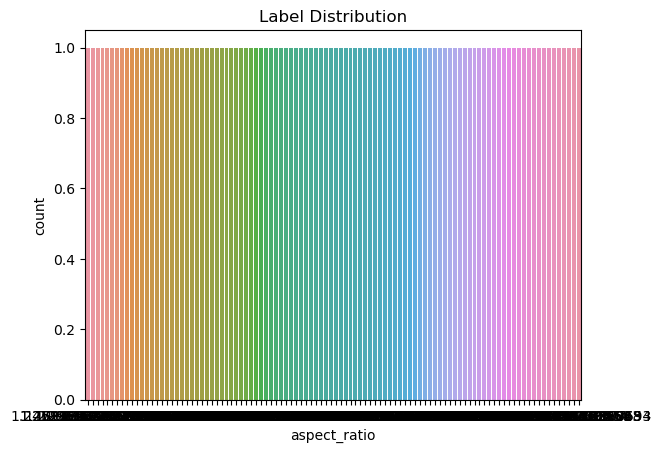

In [4]:
print("Column names:", data.columns)

# Check for missing values
print("Missing Values in Dataset:\n", data.isnull().sum())

# Displaying the distribution of the label (after identifying correct label column name)
label_column_name = "aspect_ratio"  
print("\nLabel Distribution:\n", data[label_column_name].value_counts())

# Statistical summary of the dataset
print("\nStatistical Summary:\n", data.describe())

# Visualizing the distribution of the labels
sns.countplot(x=label_column_name, data=data)
plt.title('Label Distribution')
plt.show()

## Data Preprocessing

In [45]:
# Define the target variable based on aspect_ratio
# Classify aspect ratios greater than 2 as class 1, otherwise class 0
data['label'] = (data['aspect_ratio'] > 2).astype(int)

# Split features (X) and target (y)
X = data.drop("label", axis=1)
y = data["label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel="rbf", C=10, gamma=0.1, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.9808027923211169


## Model Training

In [46]:
# Initialize and train the SVM classifier
svm_model = SVC(kernel="rbf", C=10, gamma=0.1, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Save the trained model and scaler
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

## Model Evaluation

Model Accuracy: 0.9808027923211169

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       485
           1       0.95      0.92      0.94        88

    accuracy                           0.98       573
   macro avg       0.97      0.96      0.96       573
weighted avg       0.98      0.98      0.98       573


Confusion Matrix:
 [[481   4]
 [  7  81]]


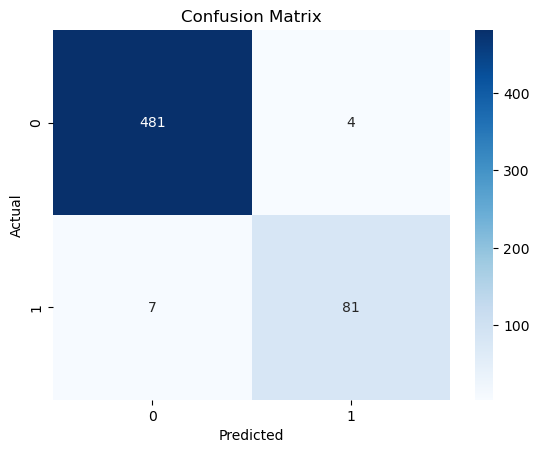

In [47]:
# Predict the labels on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Display Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Findings and Accuracy

In [48]:
# Displaying the findings
findings = f"""
Model Accuracy: {accuracy}
Classification Report:
{classification_report(y_test, y_pred)}

Confusion Matrix:
{conf_matrix}
"""

print(findings)

# Save the findings to a text file
with open("model_findings.txt", "w") as f:
    f.write(findings)



Model Accuracy: 0.9808027923211169
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       485
           1       0.95      0.92      0.94        88

    accuracy                           0.98       573
   macro avg       0.97      0.96      0.96       573
weighted avg       0.98      0.98      0.98       573


Confusion Matrix:
[[481   4]
 [  7  81]]



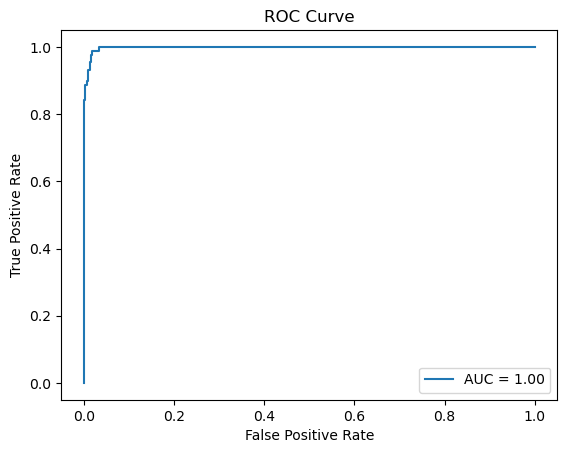

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = svm_model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Feature Importance Analysis

### Using PCA

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained Variance Ratios:", pca.explained_variance_ratio_)


Explained Variance Ratios: [0.4133076  0.18196879]


### Permutational Feature Importance

In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained Variance Ratios:", pca.explained_variance_ratio_)


Explained Variance Ratios: [0.4133076  0.18196879]
